In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt
import nonlinear_acoustic_fit
import linear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import near0_integrated_analysis

### Fitting to Debye model, only acoustic modes are considered

$\frac{C}{T}(x = T²) = Cs(x) + \gamma + \beta x$, (en mJ/mol/K), with $C_s(T)$ Schottky

Optimizing $C/T(T²)$

#### Non linear fit 

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 20 K : The optimization does not describe well the data. We may stay at low temperature to use the Debye model

Between 0 and 10 K : $\beta = 0.4861 mJ//mol/K⁴$, soit une température de Debye de $373 K$, et une ordonnée à l'origine $\gamma = 1.56 mJ/K²/mol$

However, by plotting the Schottky anomaly with the determined paramters, we can see it fails to describ the data, mainly because the E parameter seems underestimated,causing a shift to the left. In any case, the Schottky anomaly tends to 0 after 30 K², so we can realize a linear fit after 30 K². 

Beta, Gamma, n, E :  0.5975979266831422 1.383864254802588e-07 0.0011058195156459759 9.003985063664275e-23


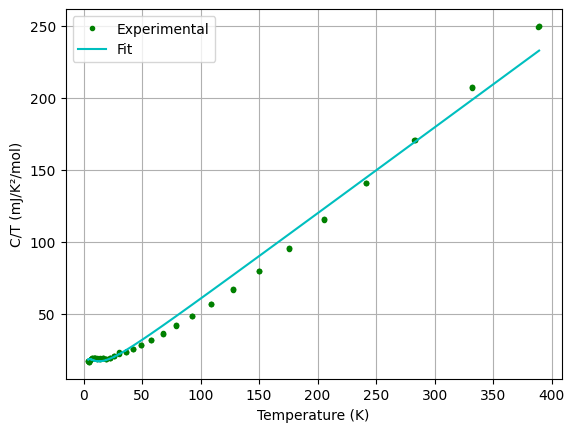

In [8]:
# Non linear fit between 0 K and 20 K

nonlinear_acoustic_fit.plot_fit_acoustic(0,400, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                                           cnt.err_sample_HC_HPHT, bounds= ([0.1, 0, 1e-3, 9e-23],[1, 10, 5e-2, 1.2e-22]))

Beta, Gamma, n, E :  0.4931775796791728 0.9756975777090646 0.0011791319969216166 1.1136080851307734e-22


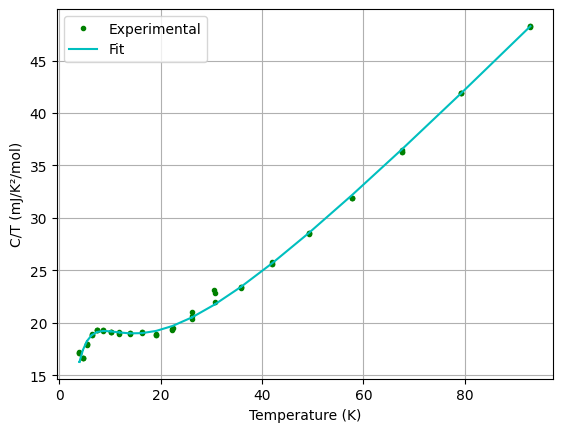

In [23]:
# Non linear fit between 0 K and 10 K

nonlinear_acoustic_fit.plot_fit_acoustic(0,100, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                                           cnt.err_sample_HC_HPHT, bounds= ([0.1, 0, 1e-3, 9e-23],[1, 10, 5e-2, 2e-22]))

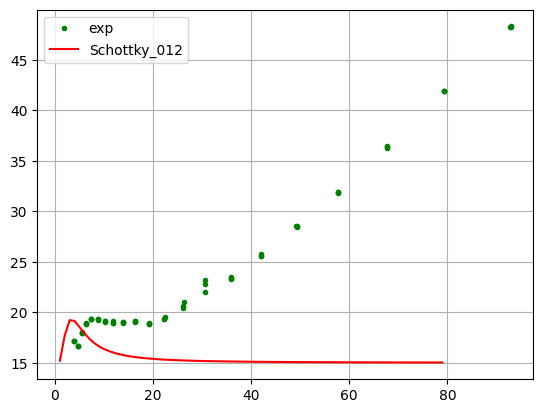

In [ ]:
squared_temp_bounded, hc_div_T_bounded = tools.tab_interval(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 0, 100)
temp_test = np.arange(1, 80, 1)

#y_fit_012 = sch.schottky(np.sqrt(squared_temp_bounded), 1.1048283717601167e-22, 0.0011518575438331385)

y_fit_012_test = sch.schottky(temp_test,  1.1136080851307734e-22, 0.0011791319969216166)

plt.figure()
plt.plot(squared_temp_bounded, hc_div_T_bounded, ".g", label="exp")
plt.plot(temp_test, y_fit_012_test, "-r", label="Schottky_012")
plt.grid(True)
plt.legend()

#### Fit linéaire

The Schottky contribution appears negligible beyond 20 K², so we can attempt to fit the data to a linear model over the ranges 0–20 K² and 0–12 K².

The data are fitted using the least‑squares method, with Monte Carlo simulations to estimate the uncertainties.

Between 40 and 400 K² : The fit yields unrealistic values ($\gamma$ < 0)

Between 5 K and 12 K :  We found $\beta = 0.479 mJ/K⁴/mol$, so a Debye temperature of $375.04 K$, and $\gamma = 4.59 mJ/mol/K²$

<Figure size 640x480 with 0 Axes>

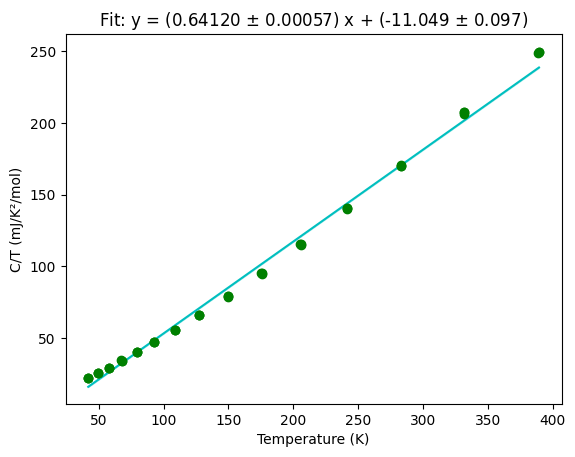

array([ 6.41203098e-01, -1.10488665e+01,  5.71847950e-04,  9.68693413e-02])

In [5]:
# Linear fit between 6 and 20 K

linear_acoustic_fit.final(40, 400, cnt.E_optic_HPHT, cnt.n_optic_HPHT,cnt.temperature_HPHT, cnt.squared_temperature_HPHT,
                           cnt.hc_div_temp_HPHT, cnt.err_squared_temperature_HPHT,cnt.err_hc_div_temp_HPHT)

<Figure size 640x480 with 0 Axes>

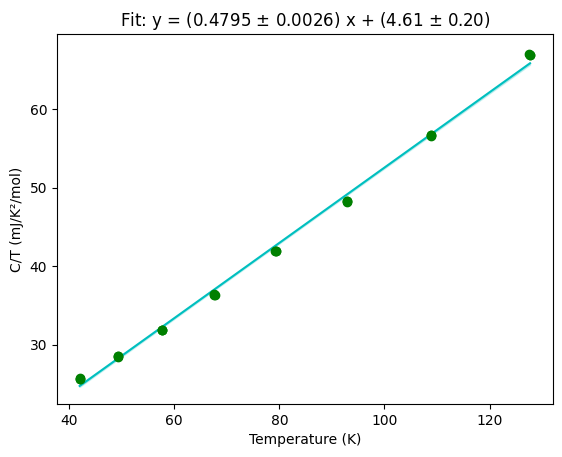

array([4.79475262e-01, 4.60840214e+00, 2.59784249e-03, 2.02067260e-01])

In [8]:
# Linear fit bewtween 5 and 12 K

linear_acoustic_fit.linear_fit(40, 144, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                               cnt.err_squared_temperature_HPHT,cnt.err_hc_div_temp_HPHT)

### Einstein model

Adding a contribution $x²$, according to Einstein model (T⁵), in order to fit the data until 20 K, not only 12 K.

#### Non linear fit

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) + \alpha x^2 = y(x)$, with $y = C/T$ and $x = T^2$

Bewtween 0 et 20 K :

$\beta = 0.459 mJ/K⁴/mol$, $\gamma = 0.566 mJ/K⁴/mol$. Debye temperature is therefore $380.41 K$

Beta, Gamma, n, E, nu :  0.45913868035279204 0.5664240982145297 0.001223842724940032 1.1441637446400501e-22 0.00047651468946626065


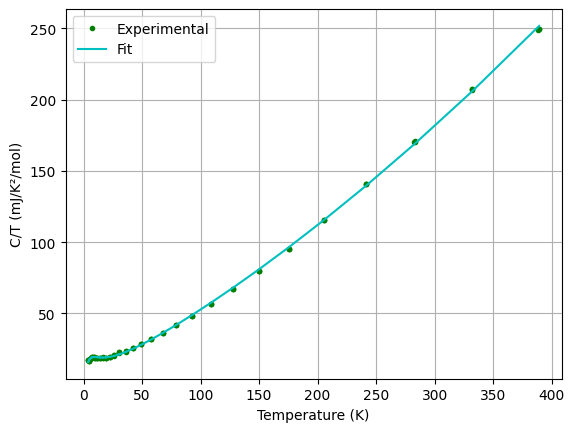

In [6]:
# Between 0 and 20 K

nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, cnt.err_hc_div_temp_HPHT,
                   bounds=([0.3, 0, 1e-3, 9.8e-23, 0], [1, 5, 5e-2, 1.2e-22, 1]))

Alpha, Beta, Gamma :  0.0005309730196545668 0.42797949730430873 5.034670163714075


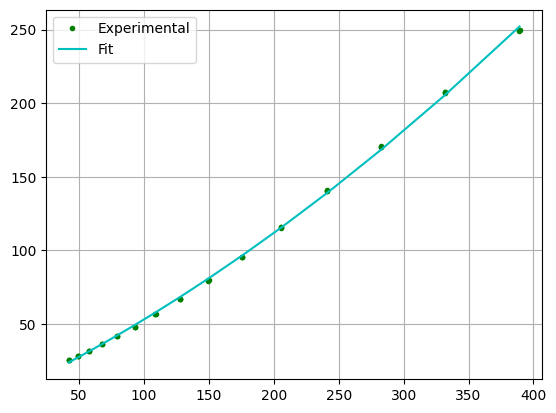

In [2]:
polynomial_optic_fit.plot_fit_quadra(40, 400, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                                     bounds=([0, 0.2, 0],[1, 1.1, 20]), opt=True)

### Fitting by a linear model, including the Debye integral

#### Linear fit

Fitting the data to : $\frac{C}{T}(x = T²) = \gamma + 9 n N_a k \frac{x}{\theta_D} I(y)$, avec $I(y) = \int \frac{y⁴ \exp(y)}{(\exp(y) - 1)²} dx$